Training Model

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('final_dataset.csv')

In [6]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,...,4167.779109,0.033611,0.404079,1,-0.000021,-0.000016,0.239311,-0.399947,0.494977,0.613714
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,...,937.137258,0.302949,1.033265,1,0.406404,0.190254,0.306376,-0.153149,0.356845,0.413727
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,...,197.222359,-0.712681,1.597605,1,-0.274656,-0.717490,0.114603,0.068012,-0.185253,0.320430
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,...,2393.654227,-0.000341,0.058888,0,-0.141411,0.503204,0.314256,0.545572,-0.831317,0.547668
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,...,4285.083772,-1.623271,-0.618951,0,-0.296158,-1.146507,0.603557,0.805945,-0.898512,0.513951


In [7]:
df.shape

(10000, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
 10  operational_hours        10000 non-null  int64  
 11  RUL                      10000 non-null  float64
 12  Vibration (mm/s)         10000 non-null  float64
 13  Pressure (Pa)            10000 non-null  float64
 14  Maintenance Required   

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Air temperature [K],10000.0,300.004930,2.000259,295.300000,298.300000,300.100000,301.500000,304.500000
Process temperature [K],10000.0,310.005560,1.483734,305.700000,308.800000,310.100000,311.100000,313.800000
Rotational speed [rpm],10000.0,1538.776100,179.284096,1168.000000,1423.000000,1503.000000,1612.000000,2886.000000
Torque [Nm],10000.0,39.986910,9.968934,3.800000,33.200000,40.100000,46.800000,76.600000
Tool wear [min],10000.0,107.951000,63.654147,0.000000,53.000000,108.000000,162.000000,253.000000
Target,10000.0,0.033900,0.180981,0.000000,0.000000,0.000000,0.000000,1.000000
operational_hours,10000.0,2599.831500,1434.530378,111.000000,1335.000000,2545.000000,3909.000000,4995.000000
RUL,10000.0,2359.175195,1434.573018,-43.059499,1040.807703,2437.613362,3612.921791,4869.004338
Vibration (mm/s),10000.0,0.002787,0.997068,-1.732027,-0.864390,0.013734,0.862230,1.731966


In [10]:
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [11]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
operational_hours          0
RUL                        0
Vibration (mm/s)           0
Pressure (Pa)              0
Maintenance Required       0
Temp_Change                0
Vib_Change                 0
Temperature_Mean           0
Vibration_Mean             0
Pressure_Mean              0
RPM_Mean                   0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [14]:
# Print Categorical Columns
cat_cols

['Product ID', 'Type', 'Failure Type']

In [15]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
L50513    1
L50514    1
L50515    1
L50516    1
L57179    1
Name: count, Length: 10000, dtype: int64
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [16]:
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [17]:
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [18]:
df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [19]:
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [20]:
# Shape Check
df.shape

(9973, 21)

In [21]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'operational_hours',
 'RUL',
 'Vibration (mm/s)',
 'Pressure (Pa)',
 'Maintenance Required',
 'Temp_Change',
 'Vib_Change',
 'Temperature_Mean',
 'Vibration_Mean',
 'Pressure_Mean',
 'RPM_Mean']

DATA VISUALISATION

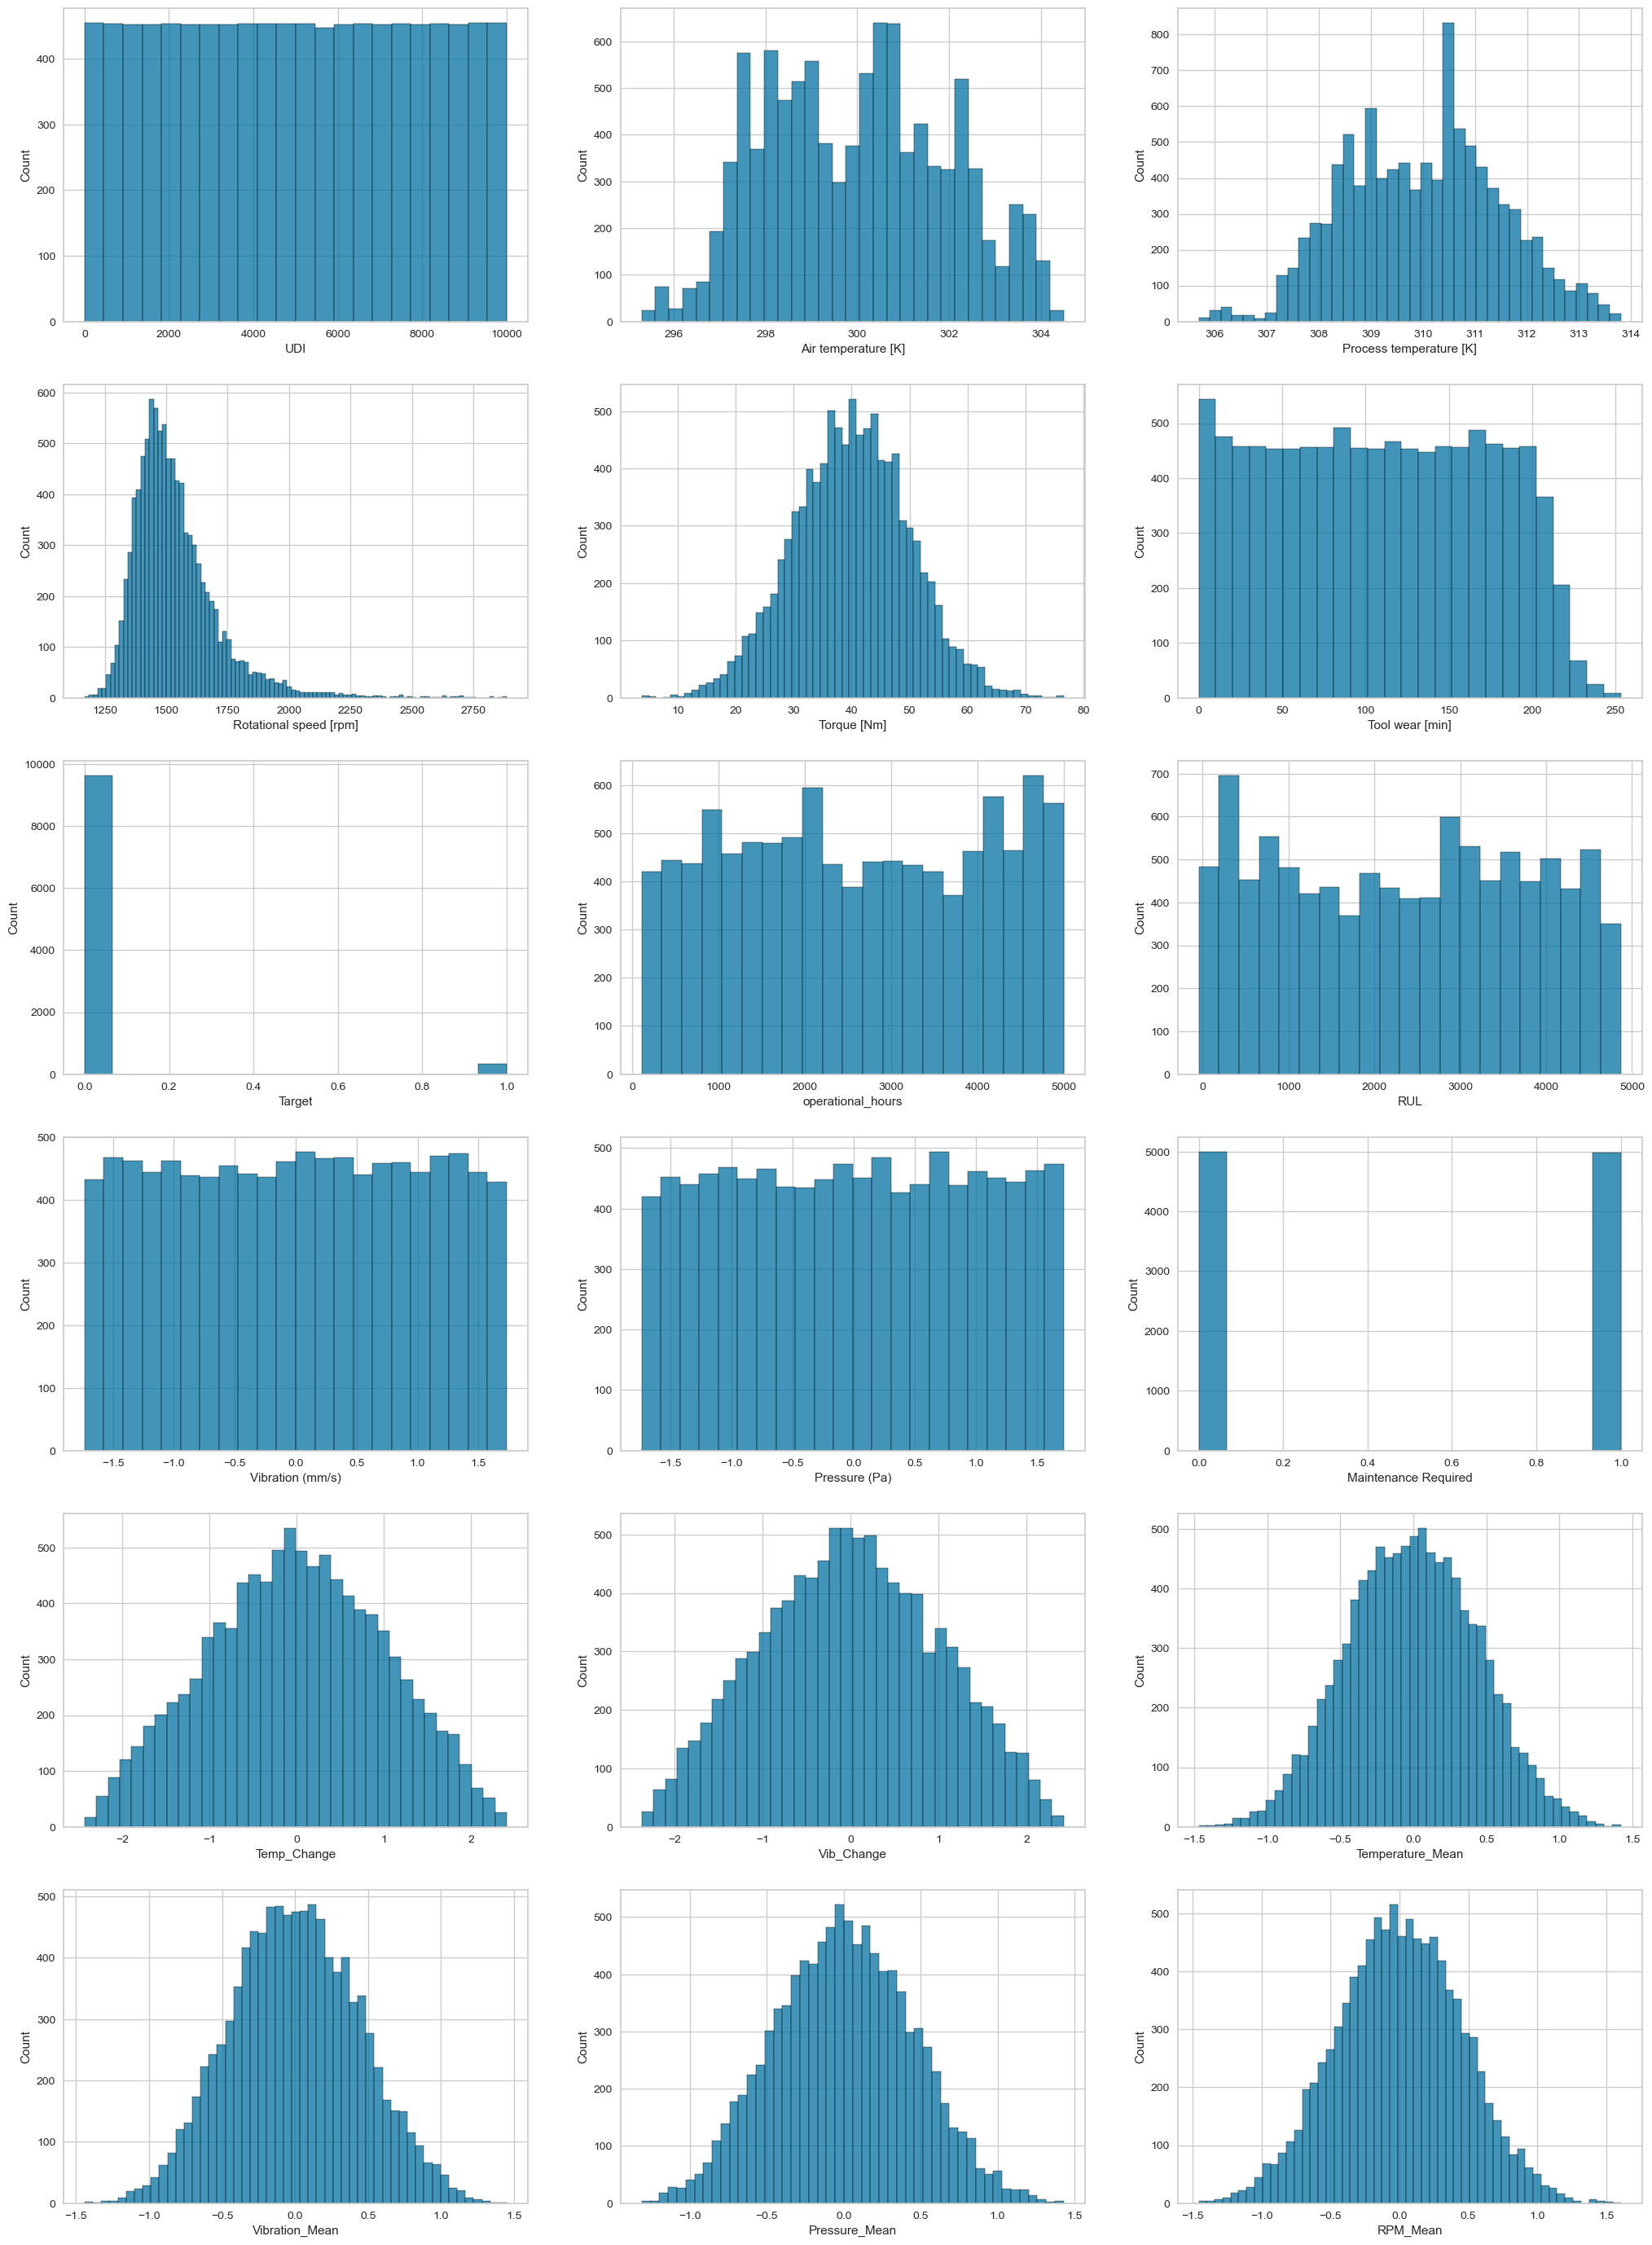

In [22]:
# Pair Plot
plt.figure(figsize= (25,35))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(6,3,i)
    sns.histplot(data= df, x= col)
plt.show()

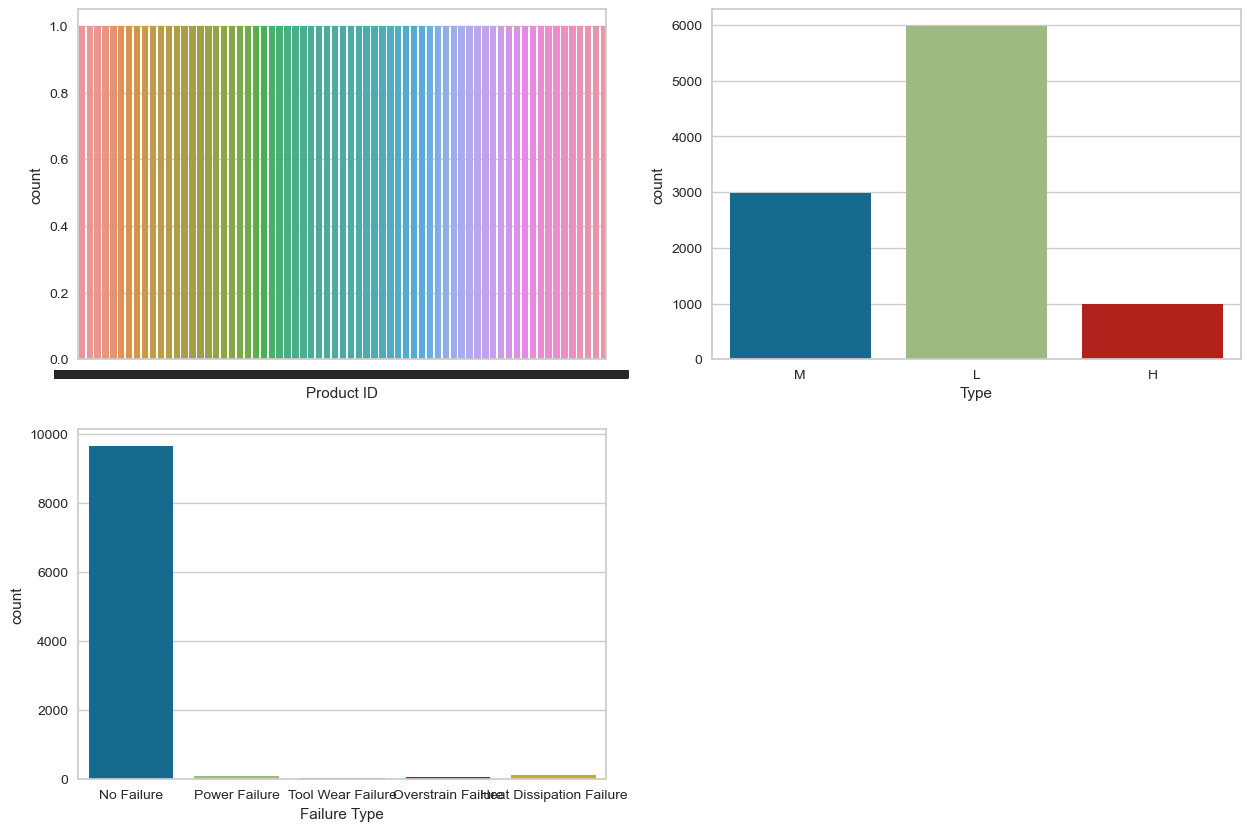

In [23]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data= df, x= col)
plt.show()

TRAINING MODEL

In [24]:
# Preparing data for model Training

x= df.drop(['Target', 'Failure Type'], axis= 1)
y= df['Target']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [27]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [28]:
cat_cols

['Product ID', 'Type']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [30]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [31]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)


Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# Fit the Modle on train data
clf= LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred= clf.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1936
           1       0.75      0.15      0.25        59

    accuracy                           0.97      1995
   macro avg       0.86      0.58      0.62      1995
weighted avg       0.97      0.97      0.96      1995



In [37]:
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regession: ', Logistic)

Logistic Regession:  0.9734335839598998


In [38]:
confusion_matrix(y_test, y_pred)

array([[1933,    3],
       [  50,    9]], dtype=int64)

In [39]:
roc_auc_score(y_test, y_pred)

0.5754963930522483

Text(0, 0.5, 'True Positive Rate')

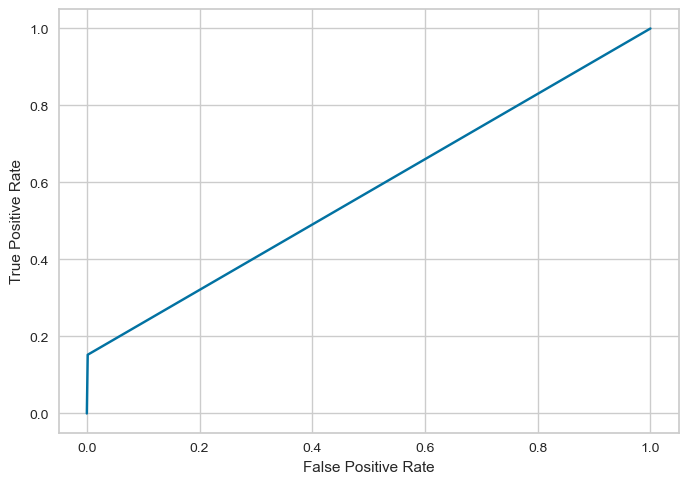

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [41]:
# Train data Analysis For Logistic Regression

In [42]:
y_pred_t= clf.predict(X_train)

In [43]:
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7707
           1       0.94      0.28      0.43       271

    accuracy                           0.97      7978
   macro avg       0.96      0.64      0.71      7978
weighted avg       0.97      0.97      0.97      7978



In [44]:
accuracy_score(y_train, y_pred_t)

0.9748057157182252

In [45]:
confusion_matrix(y_train,y_pred_t)

array([[7702,    5],
       [ 196,   75]], dtype=int64)


Support Vector MAchines

In [46]:
from sklearn.svm import SVC

In [47]:
svm= SVC()

In [48]:
svm.fit(X_train,y_train)

SVC()

In [49]:
y_pred_svm= svm.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1936
           1       1.00      0.08      0.16        59

    accuracy                           0.97      1995
   macro avg       0.99      0.54      0.57      1995
weighted avg       0.97      0.97      0.96      1995



In [51]:
SVM =accuracy_score(y_test, y_pred_svm)
print('SVM :', SVM)

SVM : 0.9729323308270676


In [52]:
confusion_matrix(y_test, y_pred_svm)

array([[1936,    0],
       [  54,    5]], dtype=int64)

In [53]:
roc_auc_score(y_test, y_pred_svm)

0.5423728813559322

Text(0, 0.5, 'True Positive Rate')

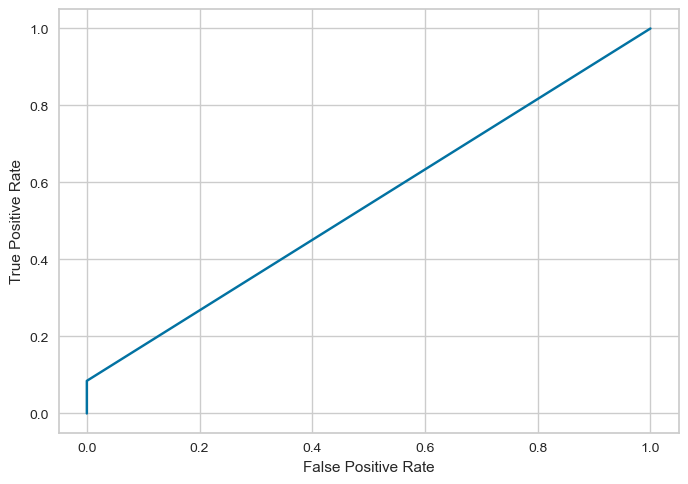

In [54]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [55]:
# Train data

In [56]:
y_pred_svmt = svm.predict(X_train)

In [57]:
print(classification_report(y_train, y_pred_svmt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7707
           1       1.00      0.21      0.35       271

    accuracy                           0.97      7978
   macro avg       0.99      0.61      0.67      7978
weighted avg       0.97      0.97      0.96      7978



In [58]:
accuracy_score(y_train, y_pred_svmt)

0.9731762346452745

In [59]:
confusion_matrix(y_train, y_pred_svmt)

array([[7707,    0],
       [ 214,   57]], dtype=int64)

In [60]:
roc_auc_score(y_train, y_pred_svmt)

0.6051660516605166

Text(0, 0.5, 'True Positive Rate')

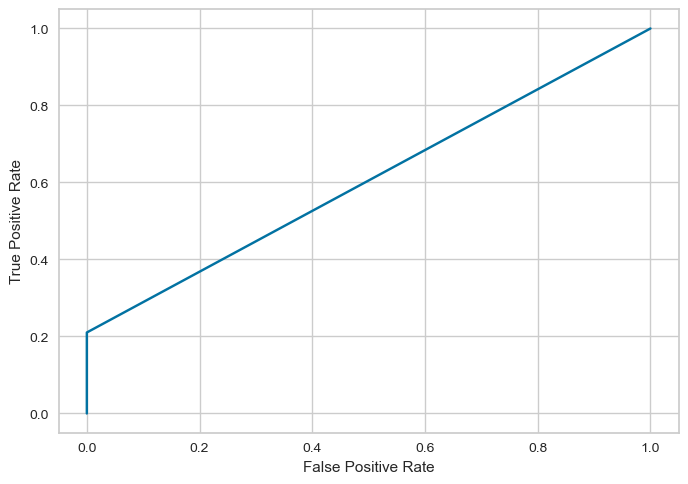

In [61]:
fpr, tpr, thresholds= roc_curve(y_train, y_pred_svmt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


SVM Model with RBF Kernel

In [62]:
rbf= SVC(kernel= 'rbf')

In [63]:
rbf.fit(X_train, y_train)

SVC()

In [64]:
y_rbf = rbf.predict(X_test)

In [65]:
print(classification_report(y_test, y_rbf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1936
           1       1.00      0.08      0.16        59

    accuracy                           0.97      1995
   macro avg       0.99      0.54      0.57      1995
weighted avg       0.97      0.97      0.96      1995



In [66]:
svm_rbf= accuracy_score(y_test, y_rbf)
print('SVM Modle with RBF Kernel: ', svm_rbf)

SVM Modle with RBF Kernel:  0.9729323308270676


In [67]:
confusion_matrix(y_test, y_rbf)

array([[1936,    0],
       [  54,    5]], dtype=int64)

In [68]:
roc_auc_score(y_test, y_rbf)

0.5423728813559322

Text(0, 0.5, 'True Positive Rate')

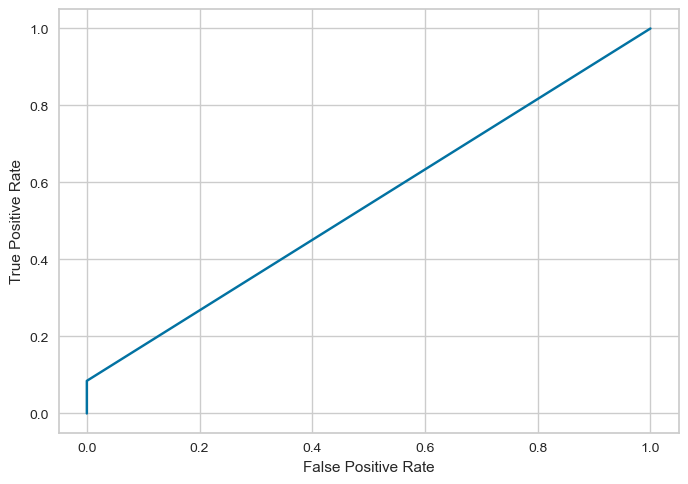

In [69]:
fpr, tpr, _ = roc_curve(y_test, y_rbf) 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [70]:
y_rbft= rbf.predict(X_train)

In [71]:
print(classification_report(y_train, y_rbft))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7707
           1       1.00      0.21      0.35       271

    accuracy                           0.97      7978
   macro avg       0.99      0.61      0.67      7978
weighted avg       0.97      0.97      0.96      7978



In [72]:
accuracy_score(y_train, y_rbft)

0.9731762346452745

In [73]:
confusion_matrix(y_train, y_rbft)

array([[7707,    0],
       [ 214,   57]], dtype=int64)

Text(0, 0.5, 'TPR')

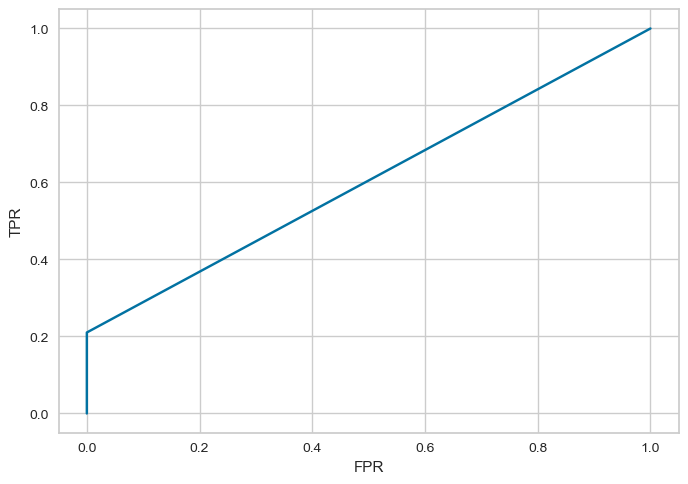

In [74]:
fpr, tpr, _= roc_curve(y_train, y_rbft)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
y_tree= tree.predict(X_test)

In [78]:
print(classification_report(y_test, y_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1936
           1       0.62      0.61      0.62        59

    accuracy                           0.98      1995
   macro avg       0.80      0.80      0.80      1995
weighted avg       0.98      0.98      0.98      1995



In [79]:
decision_tree= accuracy_score(y_test, y_tree)
print('Decision Tree: ', decision_tree)

Decision Tree:  0.9774436090225563


In [80]:
confusion_matrix(y_test, y_tree)

array([[1914,   22],
       [  23,   36]], dtype=int64)

In [81]:
roc_auc_score(y_test, y_tree)

0.7994029275808937

Text(0, 0.5, 'TPR')

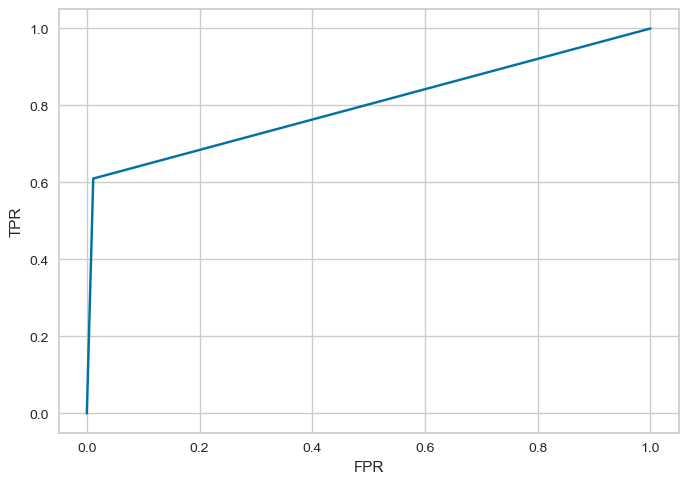

In [82]:
fpr, tpr,_ = roc_curve(y_test, y_tree)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [83]:
y_treet= tree.predict(X_train)

In [84]:
print(classification_report(y_train, y_treet))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7707
           1       1.00      1.00      1.00       271

    accuracy                           1.00      7978
   macro avg       1.00      1.00      1.00      7978
weighted avg       1.00      1.00      1.00      7978



In [85]:
accuracy_score(y_train, y_treet)

1.0

In [86]:
confusion_matrix(y_train, y_treet)

array([[7707,    0],
       [   0,  271]], dtype=int64)

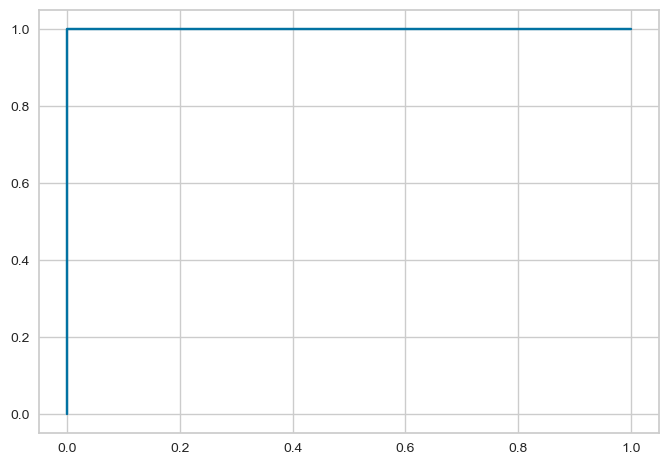

In [87]:
fpr, tpr, _= roc_curve(y_train, y_treet)
plt.plot(fpr, tpr)

In [88]:
roc_auc_score(y_train, y_treet)

1.0


Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
forest= RandomForestClassifier()

In [91]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_forest= forest.predict(X_test)

In [93]:
print(classification_report(y_test, y_forest))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1936
           1       1.00      0.03      0.07        59

    accuracy                           0.97      1995
   macro avg       0.99      0.52      0.53      1995
weighted avg       0.97      0.97      0.96      1995



In [94]:
random_forest = accuracy_score(y_test, y_forest)
print('Random Forest: ', random_forest)

Random Forest:  0.9714285714285714


In [95]:
confusion_matrix(y_test, y_forest)

array([[1936,    0],
       [  57,    2]], dtype=int64)

In [96]:
roc_auc_score(y_test, y_forest)

0.5169491525423728

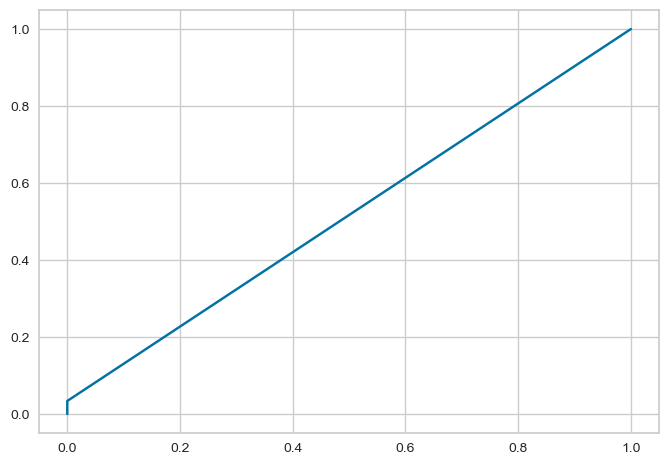

In [97]:
fpr, tpr, _= roc_curve(y_test, y_forest)
plt.plot(fpr, tpr)

In [98]:
y_forestt= forest.predict(X_train)

In [99]:
print(classification_report(y_train, y_forestt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7707
           1       1.00      1.00      1.00       271

    accuracy                           1.00      7978
   macro avg       1.00      1.00      1.00      7978
weighted avg       1.00      1.00      1.00      7978



In [100]:
confusion_matrix(y_train, y_forestt)

array([[7707,    0],
       [   0,  271]], dtype=int64)


Model Comparision

In [101]:
print('Logistic Regession: ', Logistic)
print('SVM :', SVM)
print('SVM Modle with RBF Kernel: ', svm_rbf)
print('Decision Tree: ', decision_tree)
print('Random Forest: ', random_forest)

Logistic Regession:  0.9734335839598998
SVM : 0.9729323308270676
SVM Modle with RBF Kernel:  0.9729323308270676
Decision Tree:  0.9774436090225563
Random Forest:  0.9714285714285714


In [102]:
!pip install pycaret

In [103]:
import pycaret

In [105]:
from pycaret.classification import *

s= setup(df, target = 'Failure Type', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Failure Type
2,Target type,Multiclass
3,Target mapping,"Heat Dissipation Failure: 0, No Failure: 1, Overstrain Failure: 2, Power Failure: 3, Tool Wear Failure: 4"
4,Original data shape,"(9973, 21)"
5,Transformed data shape,"(9973, 23)"
6,Transformed train set shape,"(6981, 23)"
7,Transformed test set shape,"(2992, 23)"
8,Numeric features,18
9,Categorical features,2


In [109]:
# Identify the top-performing model based on the Area Under the Curve (AUC) metric
best_model = compare_models(sort='AUC')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:30
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9923,1.0000,0.9923,0.9905,0.9909,0.8807,0.8809,0.0460
rf,Random Forest Classifier,0.9910,1.0000,0.9910,0.9874,0.9886,0.8450,0.8509,0.1810
et,Extra Trees Classifier,0.9895,1.0000,0.9895,0.9874,0.9870,0.8318,0.8334,0.1300
lightgbm,Light Gradient Boosting Machine,0.9692,0.9999,0.9692,0.9430,0.9550,0.1362,0.2260,0.3290
dt,Decision Tree Classifier,0.9748,0.9873,0.9748,0.9688,0.9700,0.6112,0.6153,0.0530
knn,K Neighbors Classifier,0.9671,0.6677,0.9671,0.9418,0.9532,0.0882,0.1486,0.1140
dummy,Dummy Classifier,0.9669,0.5000,0.9669,0.9349,0.9506,0.0000,0.0000,0.0450
lr,Logistic Regression,0.9738,0.0000,0.9738,0.9629,0.9677,0.4829,0.5059,1.5230
svm,SVM - Linear Kernel,0.9550,0.0000,0.9550,0.9377,0.9457,0.0522,0.0682,0.0850
ridge,Ridge Classifier,0.9781,0.0000,0.9781,0.9707,0.9726,0.6613,0.6647,0.0520


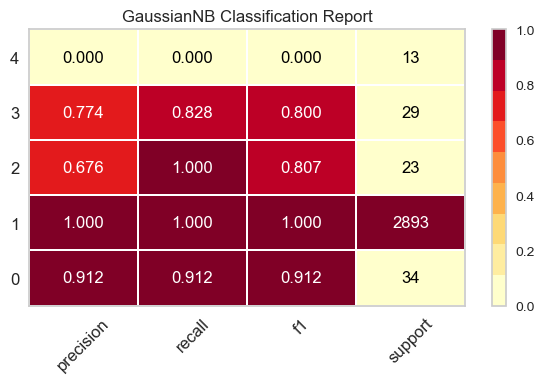

In [110]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

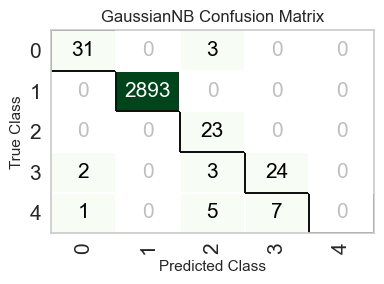

In [111]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

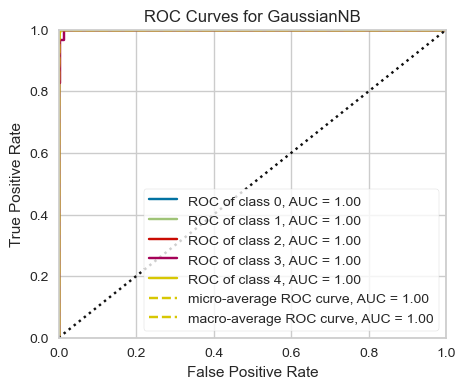

In [112]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

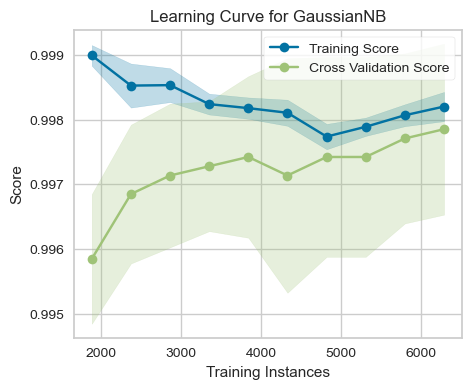

In [113]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'learning')

In [114]:
# Custom cost-benefit scoring function
def custom_cost_benefit(y_true, y_pred):
    maintenance_cost = 2050
    failure_cost = 10300
    tp = np.where((y_pred==1) & (y_true==1), failure_cost-maintenance_cost, 0)
    fp = np.where((y_pred==1) & (y_true==0), -maintenance_cost, 0)
    
    # Negative score because PyCaret optimizes for higher values, we want to minimize cost
    score = np.sum([fp, tp])
    return score

# Add custom cost-benefit metric to PyCaret
add_metric('cost_benefit', 'Cost-Benefit', custom_cost_benefit)

Name                                                      Cost-Benefit
Display Name                                              Cost-Benefit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(custom_cost_benefit, response_meth...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: cost_benefit, dtype: object

In [115]:
best_model = compare_models(sort = 'Cost-Benefit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Cost-Benefit,TT (Sec)
lr,Logistic Regression,0.9738,0.0000,0.9738,0.9629,0.9677,0.4829,0.5059,0.0000,0.4140
knn,K Neighbors Classifier,0.9671,0.6677,0.9671,0.9418,0.9532,0.0882,0.1486,0.0000,0.0980
nb,Naive Bayes,0.9923,1.0000,0.9923,0.9905,0.9909,0.8807,0.8809,0.0000,0.0530
dt,Decision Tree Classifier,0.9748,0.9873,0.9748,0.9688,0.9700,0.6112,0.6153,0.0000,0.0500
svm,SVM - Linear Kernel,0.9550,0.0000,0.9550,0.9377,0.9457,0.0522,0.0682,0.0000,0.0900
ridge,Ridge Classifier,0.9781,0.0000,0.9781,0.9707,0.9726,0.6613,0.6647,0.0000,0.0540
rf,Random Forest Classifier,0.9910,1.0000,0.9910,0.9874,0.9886,0.8450,0.8509,0.0000,0.1870
qda,Quadratic Discriminant Analysis,0.9744,0.0000,0.9744,0.9689,0.9699,0.6047,0.6088,0.0000,0.0490
ada,Ada Boost Classifier,0.9764,0.0000,0.9764,0.9696,0.9711,0.6351,0.6389,0.0000,0.2400
gbc,Gradient Boosting Classifier,0.9748,0.0000,0.9748,0.9688,0.9700,0.6112,0.6153,0.0000,1.2070


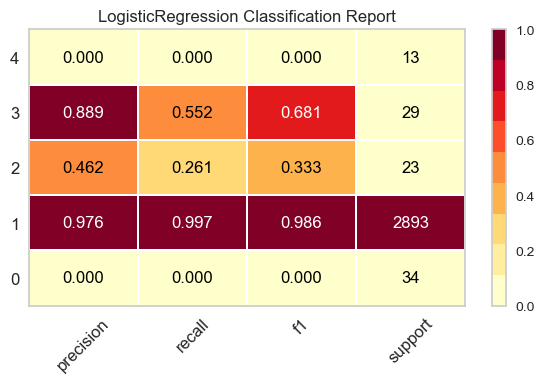

In [116]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

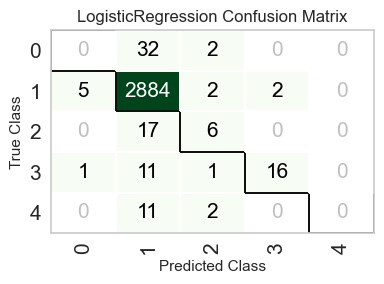

In [117]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

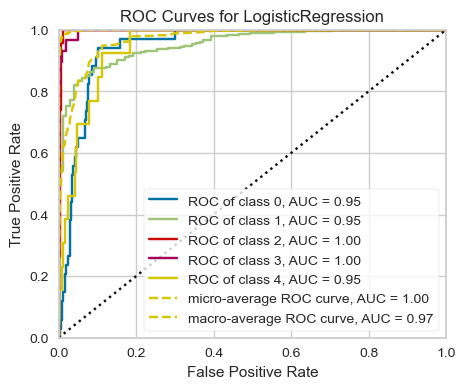

In [118]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

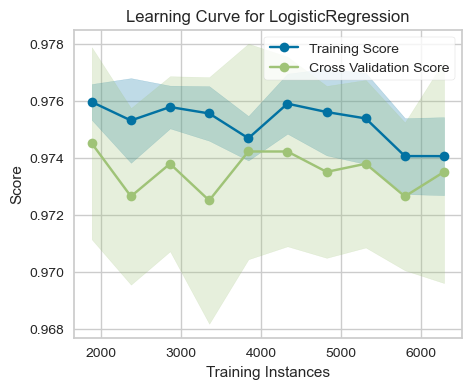

In [119]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')

In [120]:
save_model(best_model, 'predictive_maintenance.pkl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['UDI', 'Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]',
                                              'Target', 'operational_hours',
                                              'RUL', 'Vi...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  LogisticRegression(C=